In [1]:
# CUSTOMARY IMPORTS
import torch
import matplotlib.pyplot as plt
import numpy as np
from jumpml import SpeechCommandsDataset as scd
from jumpml.models import SpeechCommandsModel as scm
from jumpml.train import TrainModel
%matplotlib inline

random_seed = 1        
torch.manual_seed(random_seed)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/home/ragh/anaconda3/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [3]:
# Setup train, val and test dataloaders
sc_data = scd.SpeechCommandsData(train_bs=64, test_bs=256, val_bs=256, n_mels=64)

Found existing background directory. Removing files in that directory.
Initialize/download SpeechCommandsDataset....

SpeechCommands Dataset Size: 105829

Generate 1s background files:

Background files generated: 282

Extracting training dataset files...
Train dataset extracted: 84843 files 

Extracting test and val dataset files...
Validation dataset extracted: 9981 files
Test dataset extracted: 11005 files


In [9]:
# Setup Model, Loss, Optimizer for Training
TM = TrainModel(scm(input_size=(1,64,101)), sc_data.train_loader, sc_data.val_loader, device)

In [10]:
TM.run_training_loop(n_epochs =3)


Avg. loss: 0.0127, Accuracy: 3.357649564743042 %  Elapsed Time=9.575172185897827

Epoch-1 lr: 0.1
Train  0/85069 Loss:2.4313161373138428

Train  6400/85069 Loss:1.389864444732666

Train  12800/85069 Loss:1.51261305809021

Train  19200/85069 Loss:0.9516910314559937

Train  25600/85069 Loss:1.0094795227050781

Train  32000/85069 Loss:0.5848895907402039

Train  38400/85069 Loss:0.9878174066543579

Train  44800/85069 Loss:0.8500820398330688

Train  51200/85069 Loss:0.9741275310516357

Train  57600/85069 Loss:0.6726731061935425

Train  64000/85069 Loss:0.7792609333992004

Train  70400/85069 Loss:0.7317532896995544

Train  76800/85069 Loss:0.6565160155296326

Train  83200/85069 Loss:0.7193157076835632


Avg. loss: 0.0019, Accuracy: 85.22034454345703 %  Elapsed Time=9.53643536567688

Epoch-2 lr: 0.1
Train  0/85069 Loss:0.6071050763130188

Train  6400/85069 Loss:0.6477561593055725

Train  12800/85069 Loss:0.5033887028694153

Train  19200/85069 Loss:0.6913131475448608

Train  25600/85069 Loss:

In [15]:
TM.eval.losses

[0.012733597420450094,
 0.001868018626785545,
 0.0013883128171082893,
 0.0015883108509209911]

In [16]:
TM.val_accuracy

[array(3.3576496, dtype=float32),
 array(85.220345, dtype=float32),
 array(88.637955, dtype=float32),
 array(87.129005, dtype=float32)]

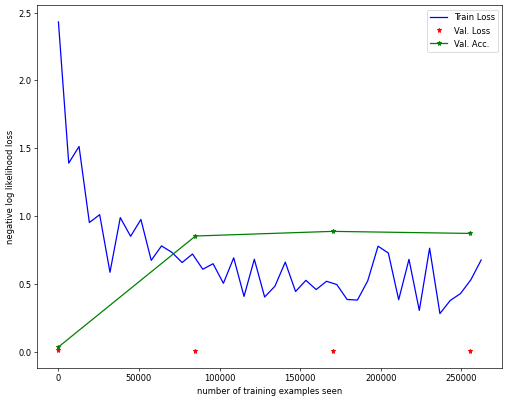

In [17]:
TM.plot_loss()

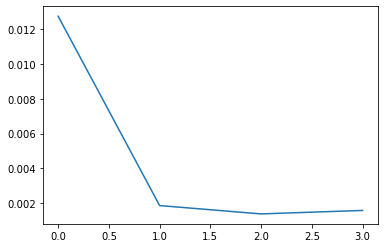

In [14]:
plt.plot(TM.eval.losses)

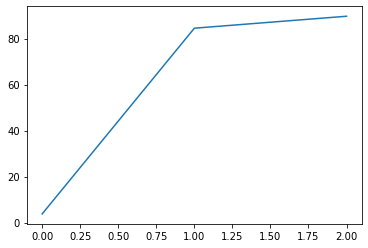

In [12]:
plt.plot(TM.val_accuracy)